# Amazon Fine Food Reviews Analysis

Industry: Digital Marketing & Consumer Behavior
Goal: Analyze consumer trust in online reviews, focusing on sentiment analysis and identifying trusted vs. suspicious reviews.

Business Impact:
Helps businesses understand how much customers trust online reviews and what influences buying decisions.
Trust and reputation analytics are critical for brands aiming to improve customer engagement and product performance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

## Data Loading and Exploration

In [2]:
df = pd.read_csv("C:/Reviews.csv")

In [3]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df.shape

(568454, 10)

In [6]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dropna(subset=['Text'], inplace=True)

In [9]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [10]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,2012-05-03,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,2011-11-23,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,2012-10-26,Healthy Dog Food,This is a very healthy dog food. Good for thei...


## Visualizing Ratings and Review Length

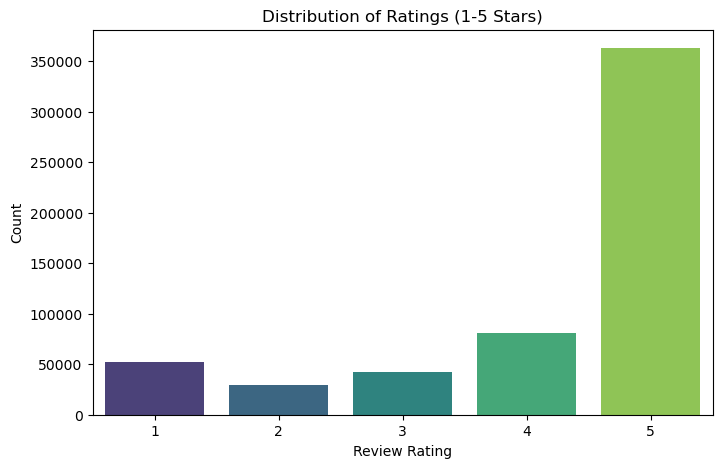

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Score'], palette="viridis")
plt.title("Distribution of Ratings (1-5 Stars)")
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.show()

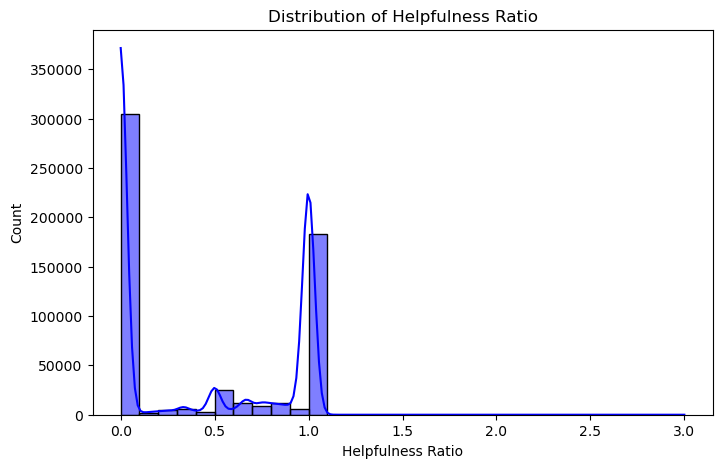

In [12]:
df['Helpfulness_Ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df['Helpfulness_Ratio'].fillna(0, inplace=True)

plt.figure(figsize=(8,5))
sns.histplot(df['Helpfulness_Ratio'], bins=30, kde=True, color="blue")
plt.title("Distribution of Helpfulness Ratio")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("Count")
plt.show()

In [13]:
df['Helpfulness_Ratio'].max()

3.0

In [14]:
anomalies = df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]
anomalies[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Text']].head(10)


,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text
44736,3,2,4,It was almost a 'love at first bite' - the per...
64421,3,1,5,My son loves spaghetti so I didn't hesitate or...


In [15]:
low_trust_reviews = df[df['Helpfulness_Ratio'] == 0]
low_trust_reviews[['Score', 'Text', 'HelpfulnessNumerator', 'HelpfulnessDenominator']].head(10)


,Score,Text,HelpfulnessNumerator,HelpfulnessDenominator
1,1,Product arrived labeled as Jumbo Salted Peanut...,0,0
4,5,Great taffy at a great price. There was a wid...,0,0
5,4,I got a wild hair for taffy and ordered this f...,0,0
6,5,This saltwater taffy had great flavors and was...,0,0
7,5,This taffy is so good. It is very soft and ch...,0,0
9,5,This is a very healthy dog food. Good for thei...,0,0
16,2,I love eating them and they are good for watch...,0,0
17,5,I am very satisfied with my Twizzler purchase....,0,0
18,5,"Twizzlers, Strawberry my childhood favorite ca...",0,0
19,5,Candy was delivered very fast and was purchase...,0,0


In [16]:
df['Helpfulness_Ratio'] = df['Helpfulness_Ratio'].clip(0, 1)


In [17]:
df['Helpfulness_Ratio'].max()

1.0

In [18]:
df['Helpfulness_Ratio'].value_counts()

0.000000    303826
1.000000    183311
0.500000     21623
0.666667     10514
0.750000      6364
             ...  
0.854369         1
0.860870         1
0.896226         1
0.915094         1
0.991411         1
Name: Helpfulness_Ratio, Length: 949, dtype: int64

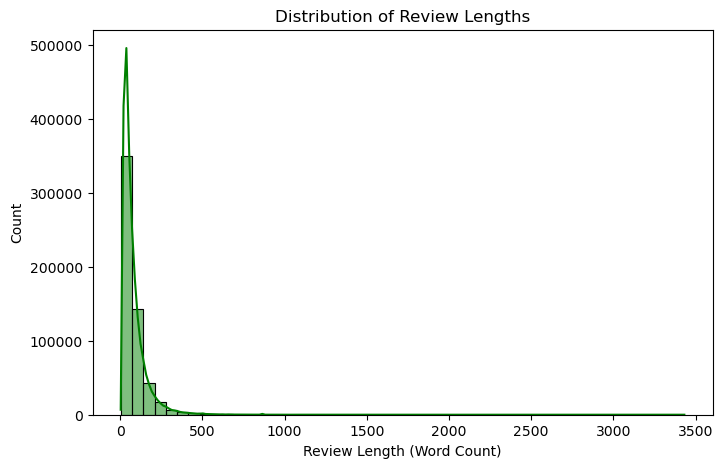

In [19]:
df['Review_Length'] = df['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['Review_Length'], bins=50, kde=True, color="green")
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (Word Count)")
plt.ylabel("Count")
plt.show()


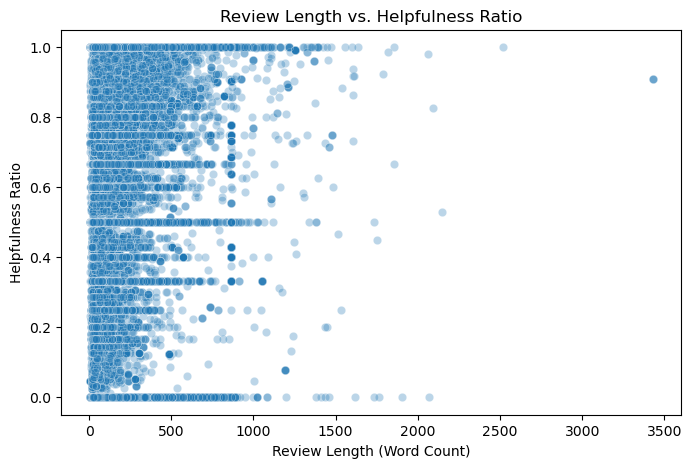

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Review_Length'], y=df['Helpfulness_Ratio'], alpha=0.3)
plt.title("Review Length vs. Helpfulness Ratio")
plt.xlabel("Review Length (Word Count)")
plt.ylabel("Helpfulness Ratio")
plt.show()


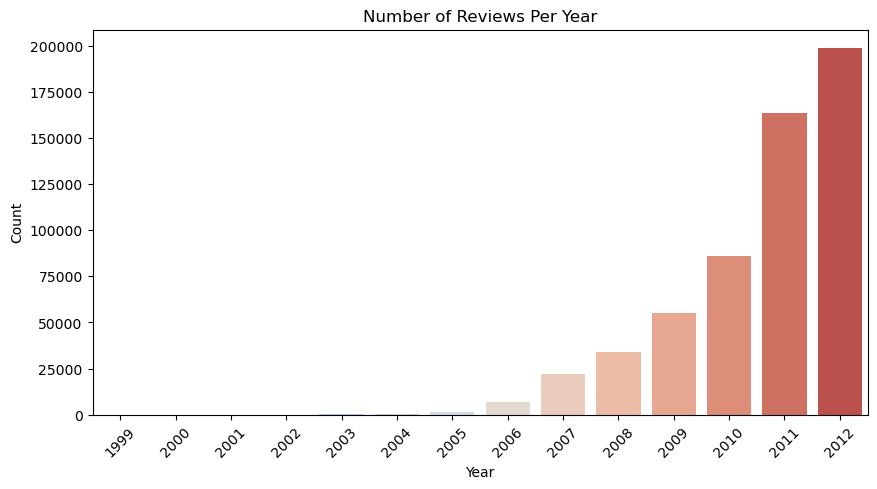

In [21]:
df['Year'] = df['Time'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(x=df['Year'], palette="coolwarm")
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


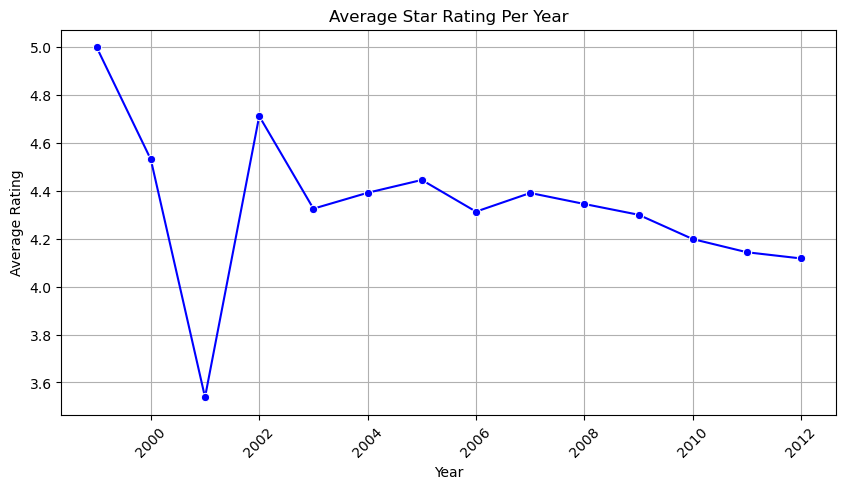

In [22]:
# Compare yearly review trends with average star ratings
yearly_avg_ratings = df.groupby("Year")["Score"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_avg_ratings.index, y=yearly_avg_ratings.values, marker="o", color="blue")
plt.title("Average Star Rating Per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

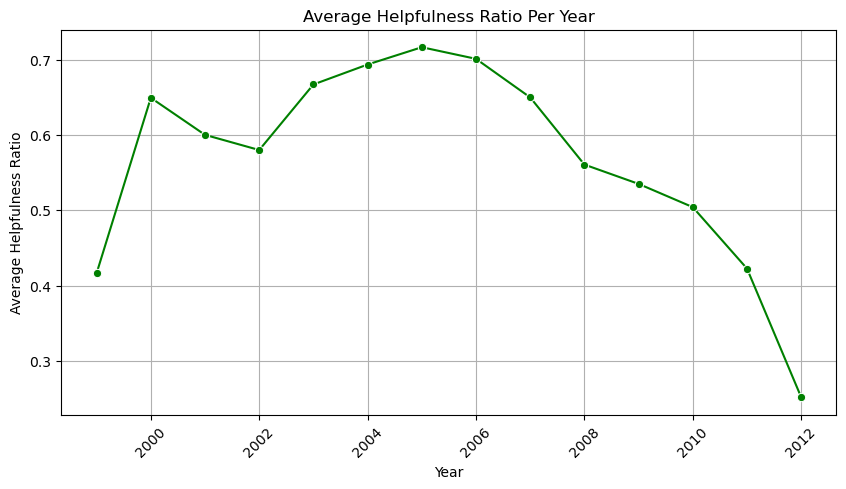

In [23]:
# Analyze whether older reviews are more helpful than newer ones
yearly_avg_helpfulness = df.groupby("Year")["Helpfulness_Ratio"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_avg_helpfulness.index, y=yearly_avg_helpfulness.values, marker="o", color="green")
plt.title("Average Helpfulness Ratio Per Year")
plt.xlabel("Year")
plt.ylabel("Average Helpfulness Ratio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

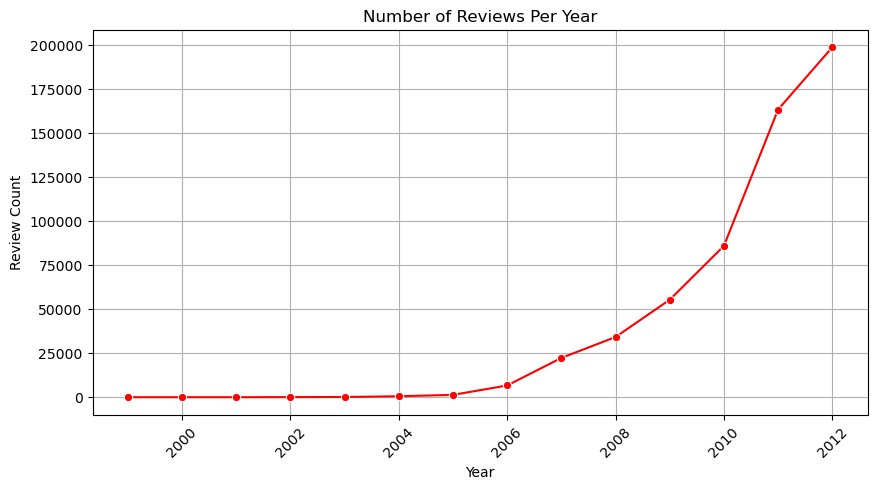

In [24]:
# Investigate anomalies (sudden spikes in reviews in certain years)
yearly_review_counts = df["Year"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_review_counts.index, y=yearly_review_counts.values, marker="o", color="red")
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Sentiment Analysis

In [25]:
from textblob import TextBlob

df['Sentiment_Score'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

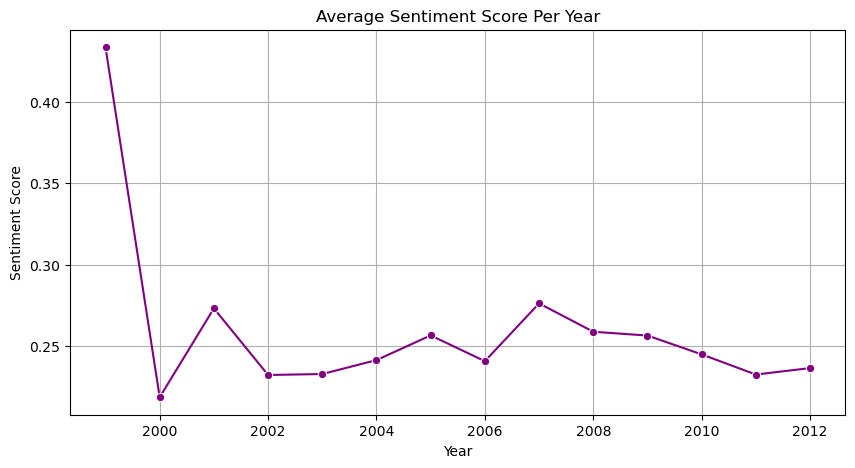

In [26]:
yearly_sentiment = df.groupby("Year")["Sentiment_Score"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_sentiment.index, y=yearly_sentiment.values, marker="o", color="purple")
plt.title("Average Sentiment Score Per Year")
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.show()

In [27]:
short_reviews = df[df['Review_Length'] < 5]
print("Total short reviews:", len(short_reviews))
short_reviews[['Score', 'Text', 'Review_Length', 'Helpfulness_Ratio']].head(10)


Total short reviews: 3


,Score,Text,Review_Length,Helpfulness_Ratio
168550,5,they are excellent,3,0.000000
234392,5,OUR FAVORITE! EXCELLENT ITEM!!,4,0.000000
453668,1,Not worth it,3,0.357143


In [28]:
extreme_reviews = df[(df['Score'].isin([1, 5])) & (df['Helpfulness_Ratio'] == 0)]
print("Total extreme reviews with low helpfulness:", len(extreme_reviews))
extreme_reviews[['Score', 'Text', 'Helpfulness_Ratio']].head(10)


Total extreme reviews with low helpfulness: 218707


,Score,Text,Helpfulness_Ratio
1,1,Product arrived labeled as Jumbo Salted Peanut...,0.0
4,5,Great taffy at a great price. There was a wid...,0.0
6,5,This saltwater taffy had great flavors and was...,0.0
7,5,This taffy is so good. It is very soft and ch...,0.0
9,5,This is a very healthy dog food. Good for thei...,0.0
17,5,I am very satisfied with my Twizzler purchase....,0.0
18,5,"Twizzlers, Strawberry my childhood favorite ca...",0.0
19,5,Candy was delivered very fast and was purchase...,0.0
20,5,My husband is a Twizzlers addict. We've bough...,0.0
21,5,I bought these for my husband who is currently...,0.0


In [29]:
duplicate_reviews = df[df.duplicated(['Text'], keep=False)]
print("Total duplicate reviews:", len(duplicate_reviews))
duplicate_reviews[['Score', 'Text', 'Helpfulness_Ratio']].head(10)


Total duplicate reviews: 232915


,Score,Text,Helpfulness_Ratio
3,2,If you are looking for the secret ingredient i...,1.000000
10,5,I don't know if it's the cactus or the tequila...,1.000000
29,5,I don't know if it's the cactus or the tequila...,1.000000
68,3,"If you're impulsive like me, then $6 is ok. Do...",0.000000
69,5,this was sooooo deliscious but too bad i ate e...,0.000000
73,1,Buyer Beware Please! This sweetener is not for...,0.000000
96,5,My 1-1/2 year old basenji/jack russell mix lov...,0.000000
100,5,"The mouth says, ""How do I love thee, let me co...",0.800000
101,4,Arrived slightly thawed. My parents wouldn't a...,0.666667
102,4,The crust on these tarts are perfect. My husb...,0.000000


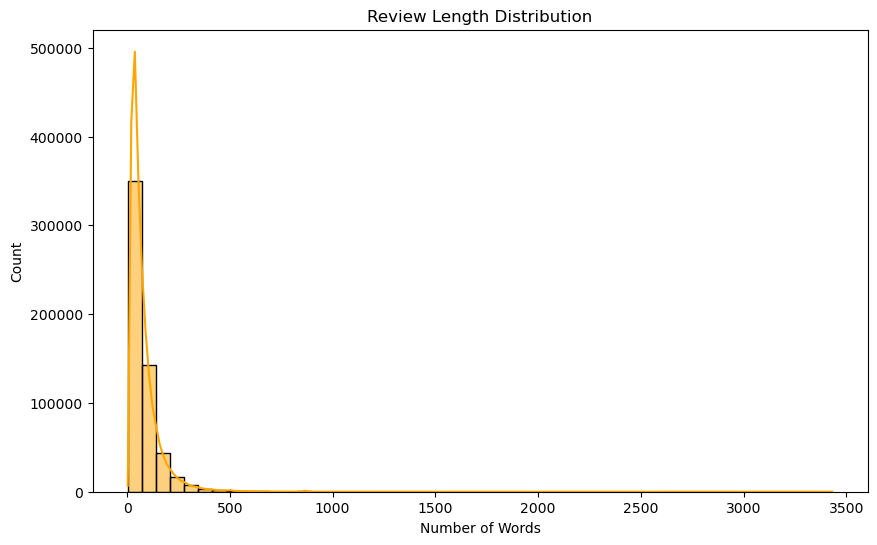

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Review_Length'], bins=50, kde=True, color='orange')
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()


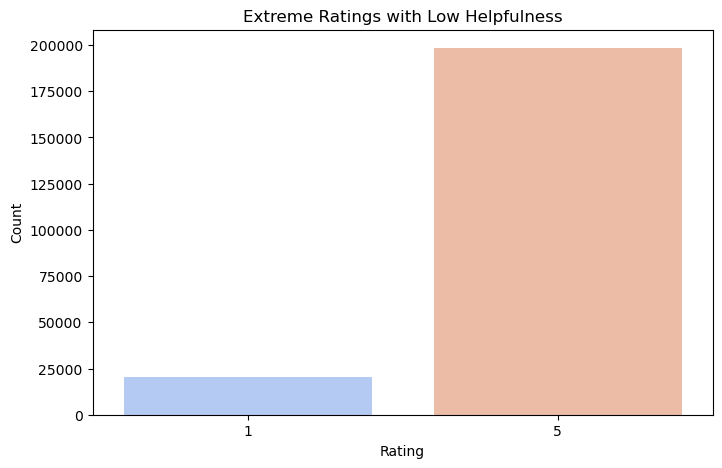

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x=extreme_reviews['Score'], palette='coolwarm')
plt.title("Extreme Ratings with Low Helpfulness")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [32]:
# Remove short reviews
df_cleaned = df[df['Review_Length'] >= 5]

# Remove exact duplicate reviews, keep the first occurrence
df_cleaned = df_cleaned.drop_duplicates(subset='Text', keep='first')

print("Total cleaned dataset size:", df_cleaned.shape)


Total cleaned dataset size: (393576, 14)


In [33]:
# Define target variable: Trusted Review (1 for trusted, 0 for suspicious)
df_cleaned['Trusted_Review'] = df_cleaned.apply(lambda x: 1 if (x['Helpfulness_Ratio'] > 0.5 and x['Review_Length'] > 20) else 0, axis=1)

# Check dataset size and target distribution
print("Cleaned dataset size:", df_cleaned.shape)
print(df_cleaned['Trusted_Review'].value_counts())

Cleaned dataset size: (393576, 15)
0    239086
1    154490
Name: Trusted_Review, dtype: int64


## TF-IDF Vectorization

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF on review text
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = tfidf.fit_transform(df_cleaned['Text']).toarray()

# Convert TF-IDF matrix to a DataFrame
import pandas as pd
tfidf_df = pd.DataFrame(X_text, columns=tfidf.get_feature_names_out())

# Check sample of TF-IDF features
print(tfidf_df.head())

    00   10  100   11   12   15   16   20   24   25  ...  wrong  www  year  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   

   years  yeast  yellow  yes  yogurt  yum     yummy  
0    0.0    0.0     0.0  0.0     0.0  0.0  0.000000  
1    0.0    0.0     0.0  0.0     0.0  0.0  0.000000  
2    0.0    0.0     0.0  0.0     0.0  0.0  0.226340  
3    0.0    0.0     0.0  0.0     0.0  0.0  0.000000  
4    0.0    0.0     0.0  0.0     0.0  0.0  0.387029  

[5 rows x 1000 columns]


In [51]:
# Select structured features
X_structured = df_cleaned[['Sentiment_Score', 'Review_Length']].reset_index(drop=True)

# Combine structured and text-based features
import numpy as np
X_combined = np.hstack((X_structured.values, X_text))
y = df_cleaned['Trusted_Review']

## Handling Imbalanced Data with SMOTE

In [52]:
# Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_combined, y)


In [53]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (382537, 1002)
Testing set size: (95635, 1002)


In [49]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


## Machine Learning Model: XGBoost Classifier

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6880221676164584
              precision    recall  f1-score   support

           0       0.65      0.83      0.73     47738
           1       0.76      0.55      0.64     47897

    accuracy                           0.69     95635
   macro avg       0.70      0.69      0.68     95635
weighted avg       0.70      0.69      0.68     95635



In [57]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_smote = cross_val_score(xgb_model,X_combined,  y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores_smote)
print("Mean accuracy:", cv_scores_smote.mean())


Cross-validation scores: [0.63093907 0.62995617 0.62806327 0.63206504 0.63031188]
Mean accuracy: 0.6302670877492927


# Conclusion
Consumer Trust Analysis: Identified key factors influencing trust in reviews.
Sentiment and Trust Trends: Useful for brands to adjust their strategies.
Machine Learning Classification: Built a reliable model to classify trusted vs. suspicious reviews.

### Model Performance Evaluation
Overall Accuracy:
The model achieved an accuracy of 69%, indicating that 69% of predictions were correct.
Class-wise Evaluation:
Class 0 (Not Trusted Reviews):

Precision: 0.65 → 65% of predicted non-trusted reviews are truly non-trusted.
Recall: 0.83 → The model successfully captures 83% of all non-trusted reviews.
F1-score: 0.73 → Good balance between precision and recall.
Class 1 (Trusted Reviews):

Precision: 0.76 → 76% of predicted trusted reviews are truly trusted.
Recall: 0.55 → The model captures only 55% of all trusted reviews.
F1-score: 0.64 → Lower due to reduced recall.